In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import interpolation as inter
from contour_sort import *
from fix_image_orientation import *
from crop_image import *
from paper_extraction import *
from commonfunctions import *

In [12]:
img = cv2.imread('../../Results/Results/2/4/1.jpg')

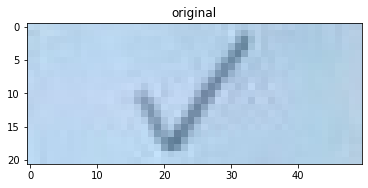

In [13]:
show_images([img], ['original'])